In [1]:
import numpy as np
import tensorflow as tf
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
def auto_encoder(_x):
    _x = tf.reshape(_x, shape=(-1, 28, 28, 1))
    # [28 28 1]
    encoder = tf.contrib.layers.conv2d(_x, 16, 13, 1, 'valid')
    # [16 16 16]
    encoder = tf.layers.flatten(encoder)
    # [4096]
    code = tf.contrib.layers.fully_connected(inputs=encoder, num_outputs=1024)
    # [1024]
    decoder = tf.reshape(code, shape=(-1, 8, 8, 16))
    # [8 8 16]
    decoder = tf.contrib.layers.conv2d_transpose(decoder, 1, 21, 1, 'valid')
    # [28 28 1]
    return decoder

In [3]:
def loss(_x, decoder):
    reconstruct = tf.reshape(decoder, shape=(-1, 784))
    x_True = tf.reshape(_x, shape=(-1, 784))
    
    loss = tf.reduce_mean(tf.square(reconstruct - x_True))
    
    return loss

In [7]:
tf.reset_default_graph()

sess = tf.Session()

_x = tf.placeholder(tf.float32, [None, 784])

decoder = auto_encoder(_x)
total_loss = loss(_x, decoder)

global_step = tf.Variable(0, name='global_step', trainable=False)
optimizer = tf.train.AdamOptimizer()
train_op = optimizer.minimize(total_loss, global_step=global_step)

sess.run(tf.global_variables_initializer())

In [9]:
def train():
    epoch_num = 1000
    
    for e in range(epoch_num):
        global_step_num = sess.run(global_step)

        batch_x, _ = mnist.train.next_batch(32, shuffle=True)
        _, loss = sess.run([train_op, total_loss], feed_dict={_x: batch_x})
        
        if e % 100 == 0 and e > 0:
            print('step: {} loss: {:>3.3f}'.format(e + 1, loss))

train()

step: 101 loss: 0.015
step: 201 loss: 0.011
step: 301 loss: 0.007
step: 401 loss: 0.007
step: 501 loss: 0.006
step: 601 loss: 0.006
step: 701 loss: 0.004
step: 801 loss: 0.004
step: 901 loss: 0.004


Original Images


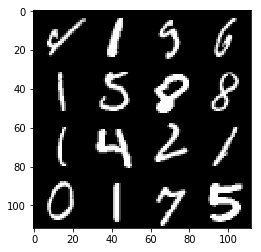

Reconstructed Images


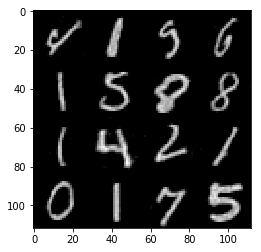

In [10]:
def test():
    n = 4
    
    canvas_orig = np.empty((28 * n, 28 * n))
    canvas_recon = np.empty((28 * n, 28 * n))
    for i in range(n):
        batch_x, _ = mnist.test.next_batch(n)
        
        recon = sess.run(decoder, feed_dict={_x: batch_x})

        # Display original images
        for j in range(n):
            # Draw the generated digits
            canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
        # Display reconstructed images
        for j in range(n):
            # Draw the generated digits
            canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = recon[j].reshape([28, 28])

    print("Original Images")     
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_orig, origin="upper", cmap="gray")
    plt.show()

    print("Reconstructed Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_recon, origin="upper", cmap="gray")
    plt.show()
    
test()